In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [2]:
# Load data
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Check dimension of data
data.shape

(284807, 31)

In [4]:
# Understand column types
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
# Understand numerical data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Check for missing values
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values in the dataset.

In [7]:
# Check for duplicates
data.duplicated().sum()

1081

In [8]:
# Remove duplicated rows
data = data.drop_duplicates()

In [9]:
# Check for duplicates again
data.duplicated().sum()

0

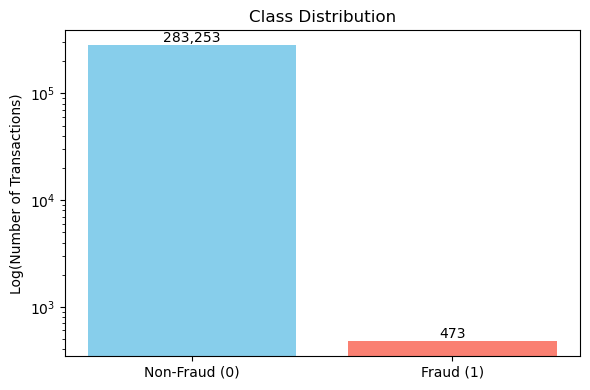

In [10]:
#Check imbalance within the dataset

# Count of each class
class_counts = data['Class'].value_counts()

# Bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])
plt.yscale('log')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.ylabel('Log(Number of Transactions)')
plt.title('Class Distribution')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height):,}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

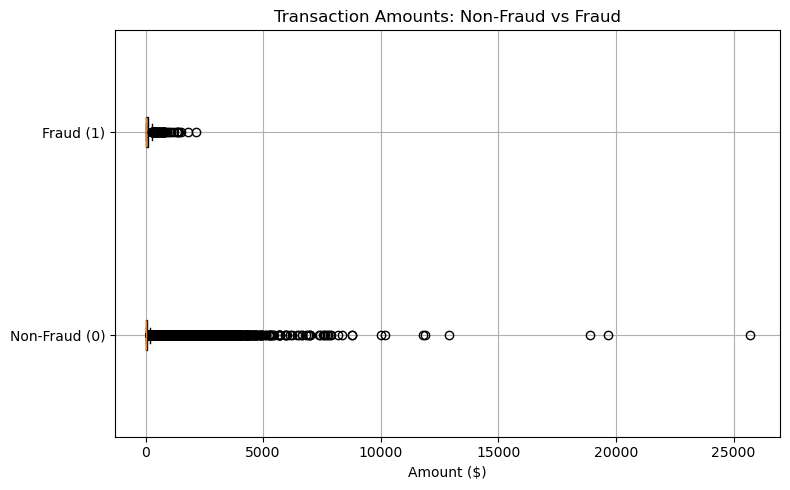

In [11]:
# Create boxplots of transaction amounds between fraudulent and non-fraudulent tractions
# Split the data
fraud_amounts = data[data['Class'] == 1]['Amount']
nonfraud_amounts = data[data['Class'] == 0]['Amount']

# Boxplot
plt.figure(figsize=(8, 5))
plt.boxplot([nonfraud_amounts, fraud_amounts],
            vert=False,
            patch_artist=True,
            labels=['Non-Fraud (0)', 'Fraud (1)'],
            boxprops=dict(facecolor='skyblue'))

plt.title('Transaction Amounts: Non-Fraud vs Fraud')
plt.xlabel('Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

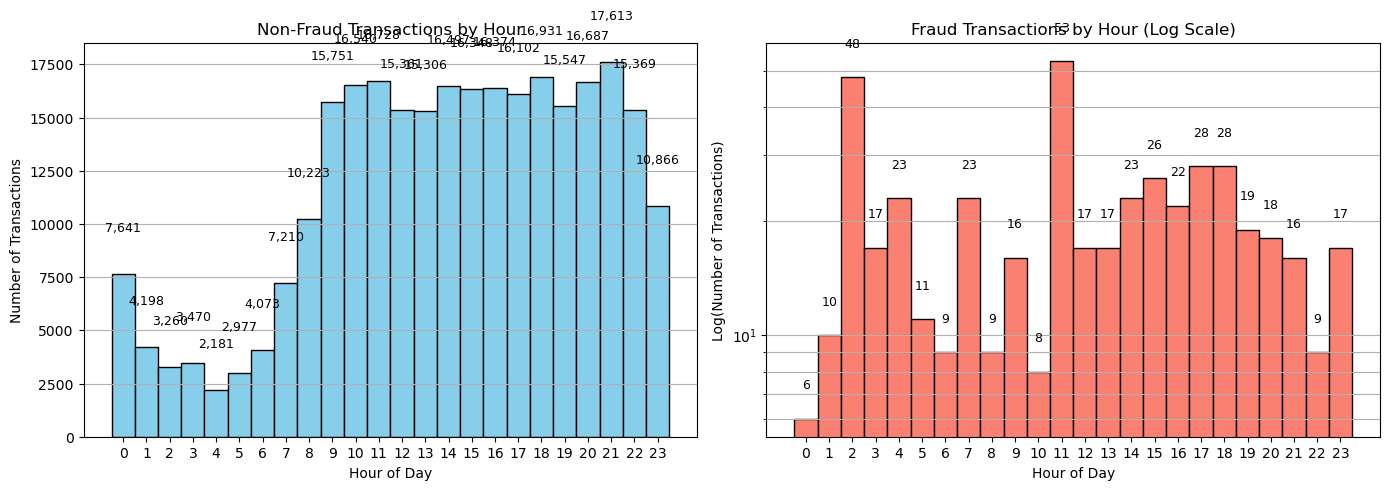

In [12]:
# Understand timing of transactions

# Create Hour Column
data['Hour'] = (data['Time'] // 3600) % 24

# Split data
fraud = data[data['Class'] == 1]
nonfraud = data[data['Class'] == 0]

# Bins
bins = np.arange(25) - 0.5

# Set up figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# Non-Fraud Plot (Linear)
counts_nf, _, _ = axes[0].hist(nonfraud['Hour'], bins=bins, color='skyblue', edgecolor='black')
axes[0].set_title('Non-Fraud Transactions by Hour')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_xticks(range(24))
axes[0].grid(axis='y')

# Add labels
for i, count in enumerate(counts_nf):
    if count > 0:
        axes[0].text(i, count + 2000, f'{int(count):,}', ha='center', fontsize=9)

# Fraud Plot (Log Scale)
counts_f, _, _ = axes[1].hist(fraud['Hour'], bins=bins, color='salmon', edgecolor='black')
axes[1].set_yscale('log')
axes[1].set_title('Fraud Transactions by Hour (Log Scale)')
axes[1].set_xlabel('Hour of Day')
axes[1].set_xticks(range(24))
axes[1].set_ylabel('Log(Number of Transactions)')
axes[1].grid(axis='y', which='both')

# Add value labels (adjusted for log scale visibility)
for i, count in enumerate(counts_f):
    if count > 0:
        axes[1].text(i, count * 1.2, str(int(count)), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

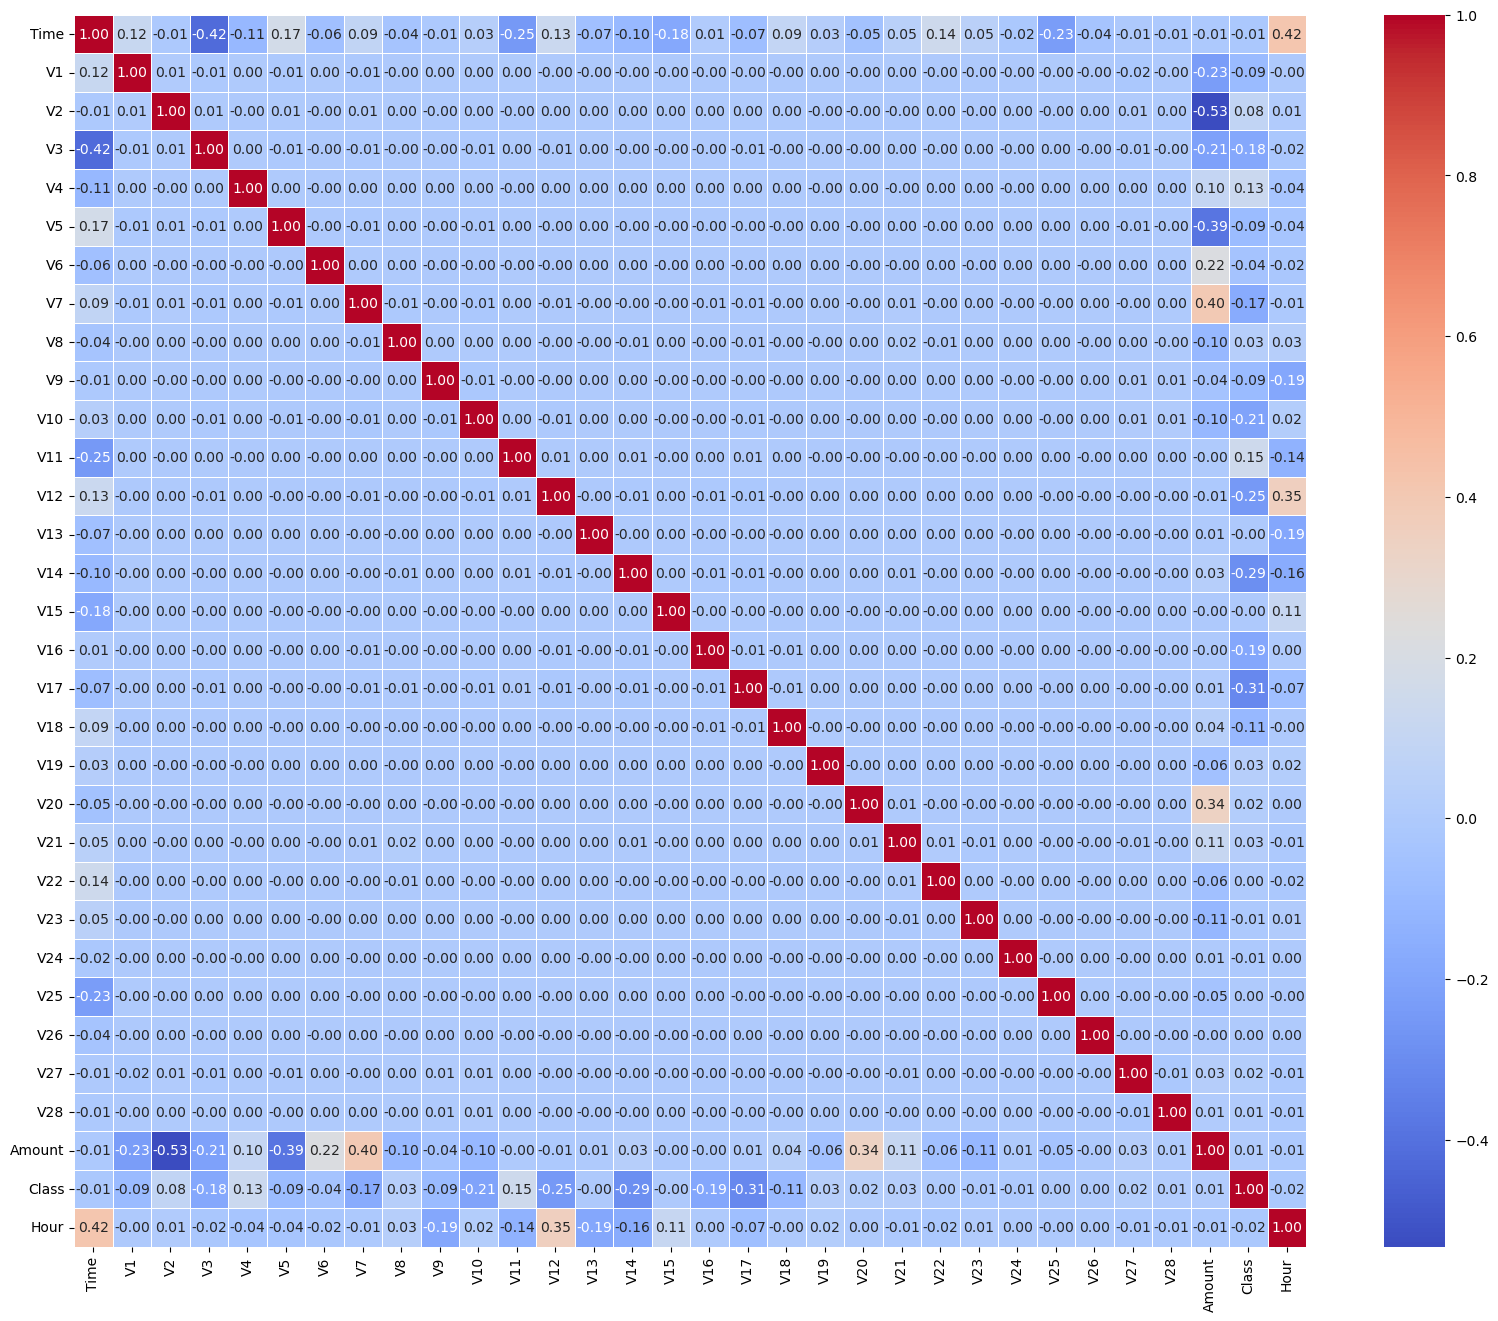

In [13]:
# Create Correlation Heatmap to conduct preliminary analysis
plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10}, square=True)

plt.show()

In [14]:
# Time and Amount Columns before scaling
print(data[['Time', 'Amount']].describe())

                Time         Amount
count  283726.000000  283726.000000
mean    94811.077600      88.472687
std     47481.047891     250.399437
min         0.000000       0.000000
25%     54204.750000       5.600000
50%     84692.500000      22.000000
75%    139298.000000      77.510000
max    172792.000000   25691.160000


In [15]:
# Scale Amount and Time variables
scaler = StandardScaler()
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

In [16]:
# Time and Amount Columns after scaling
print(data[['Time', 'Amount']].describe())

               Time        Amount
count  2.837260e+05  2.837260e+05
mean   1.218105e-16 -5.409347e-17
std    1.000002e+00  1.000002e+00
min   -1.996823e+00 -3.533268e-01
25%   -8.552128e-01 -3.309625e-01
50%   -2.131081e-01 -2.654671e-01
75%    9.369423e-01 -4.378088e-02
max    1.642362e+00  1.022476e+02


In [17]:
# Create feature and target variables
X = data.drop('Class', axis=1)
y = data['Class']

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [19]:
# TEMP: Reduce dataset size (e.g., to 50k rows)
data_sampled = data.sample(n=50000, random_state=42)

# SMOTE on training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [20]:
# Define Models
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_res, y_train_res)

# Random Forest
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42, n_jobs=-1)
rf.fit(X_train_res, y_train_res)

# XGBoost
xgb = XGBClassifier(n_estimators=50, max_depth=3, use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
xgb.fit(X_train_res, y_train_res)

C:\Users\chris\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:09:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=-1,
              num_parallel_tree=None, ...)

In [21]:
# Evalute models

# Store results
results = []

models = {'Logistic Regression': lr, 'Random Forest': rf, 'XGBoost': xgb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    results.append({
        'Model': name,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'ROC AUC': roc_auc
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display the table
results_df = results_df.round(4)
results_df

,Model,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.0529,0.8737,0.0998,0.9659
1,Random Forest,0.2468,0.8211,0.3796,0.9728
2,XGBoost,0.1455,0.8421,0.2481,0.9718


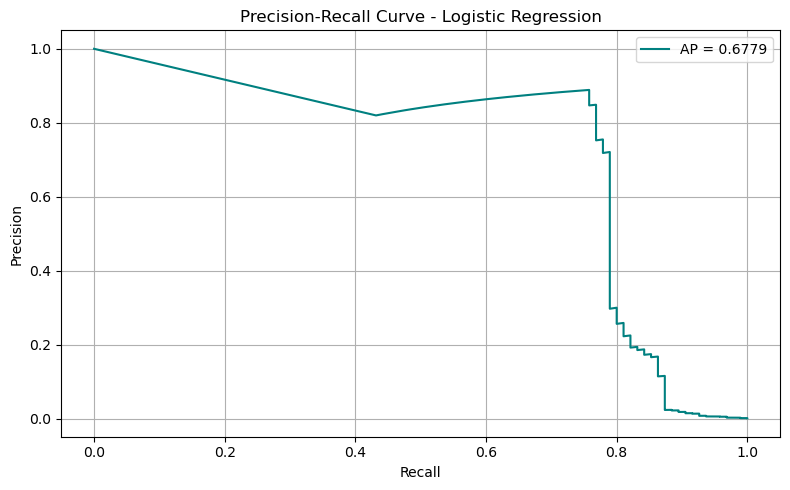

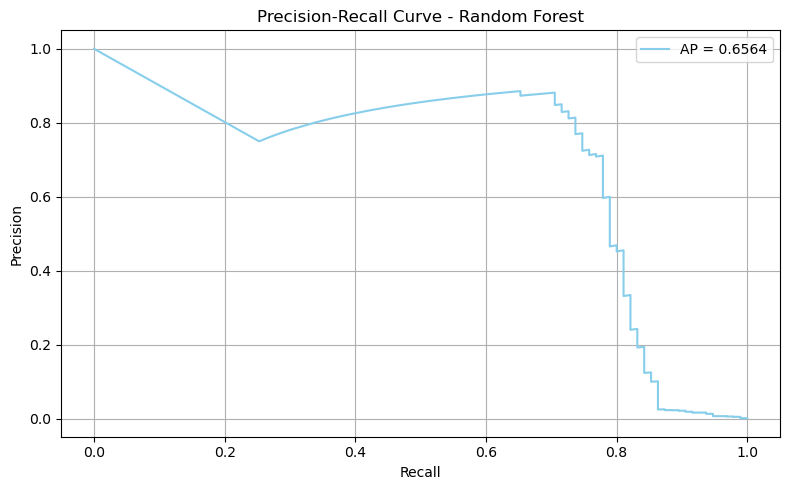

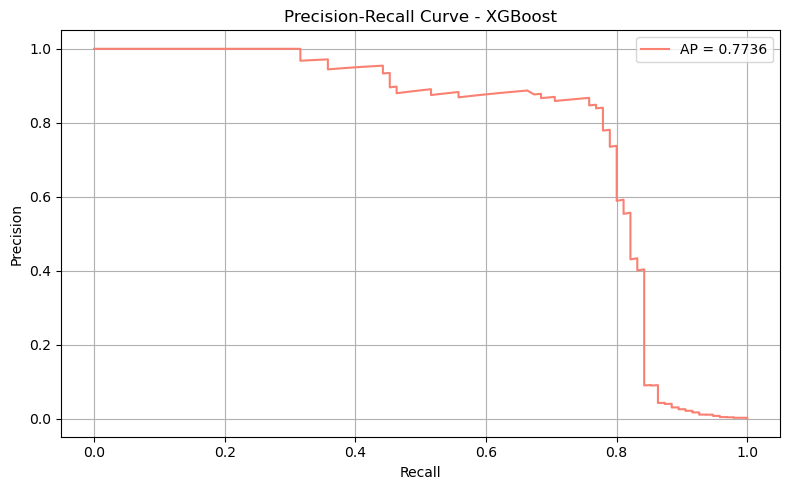

In [22]:
# --- Get predicted probabilities ---
lr_probs = lr.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
xgb_probs = xgb.predict_proba(X_test)[:, 1]

# --- Compute precision-recall curves ---
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)

# --- Compute Average Precision Scores ---
lr_ap = average_precision_score(y_test, lr_probs)
rf_ap = average_precision_score(y_test, rf_probs)
xgb_ap = average_precision_score(y_test, xgb_probs)

# --- Plot: Logistic Regression ---
plt.figure(figsize=(8, 5))
plt.plot(lr_recall, lr_precision, color='teal', label=f'AP = {lr_ap:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot: Random Forest ---
plt.figure(figsize=(8, 5))
plt.plot(rf_recall, rf_precision, color='skyblue', label=f'AP = {rf_ap:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot: XGBoost ---
plt.figure(figsize=(8, 5))
plt.plot(xgb_recall, xgb_precision, color='salmon', label=f'AP = {xgb_ap:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

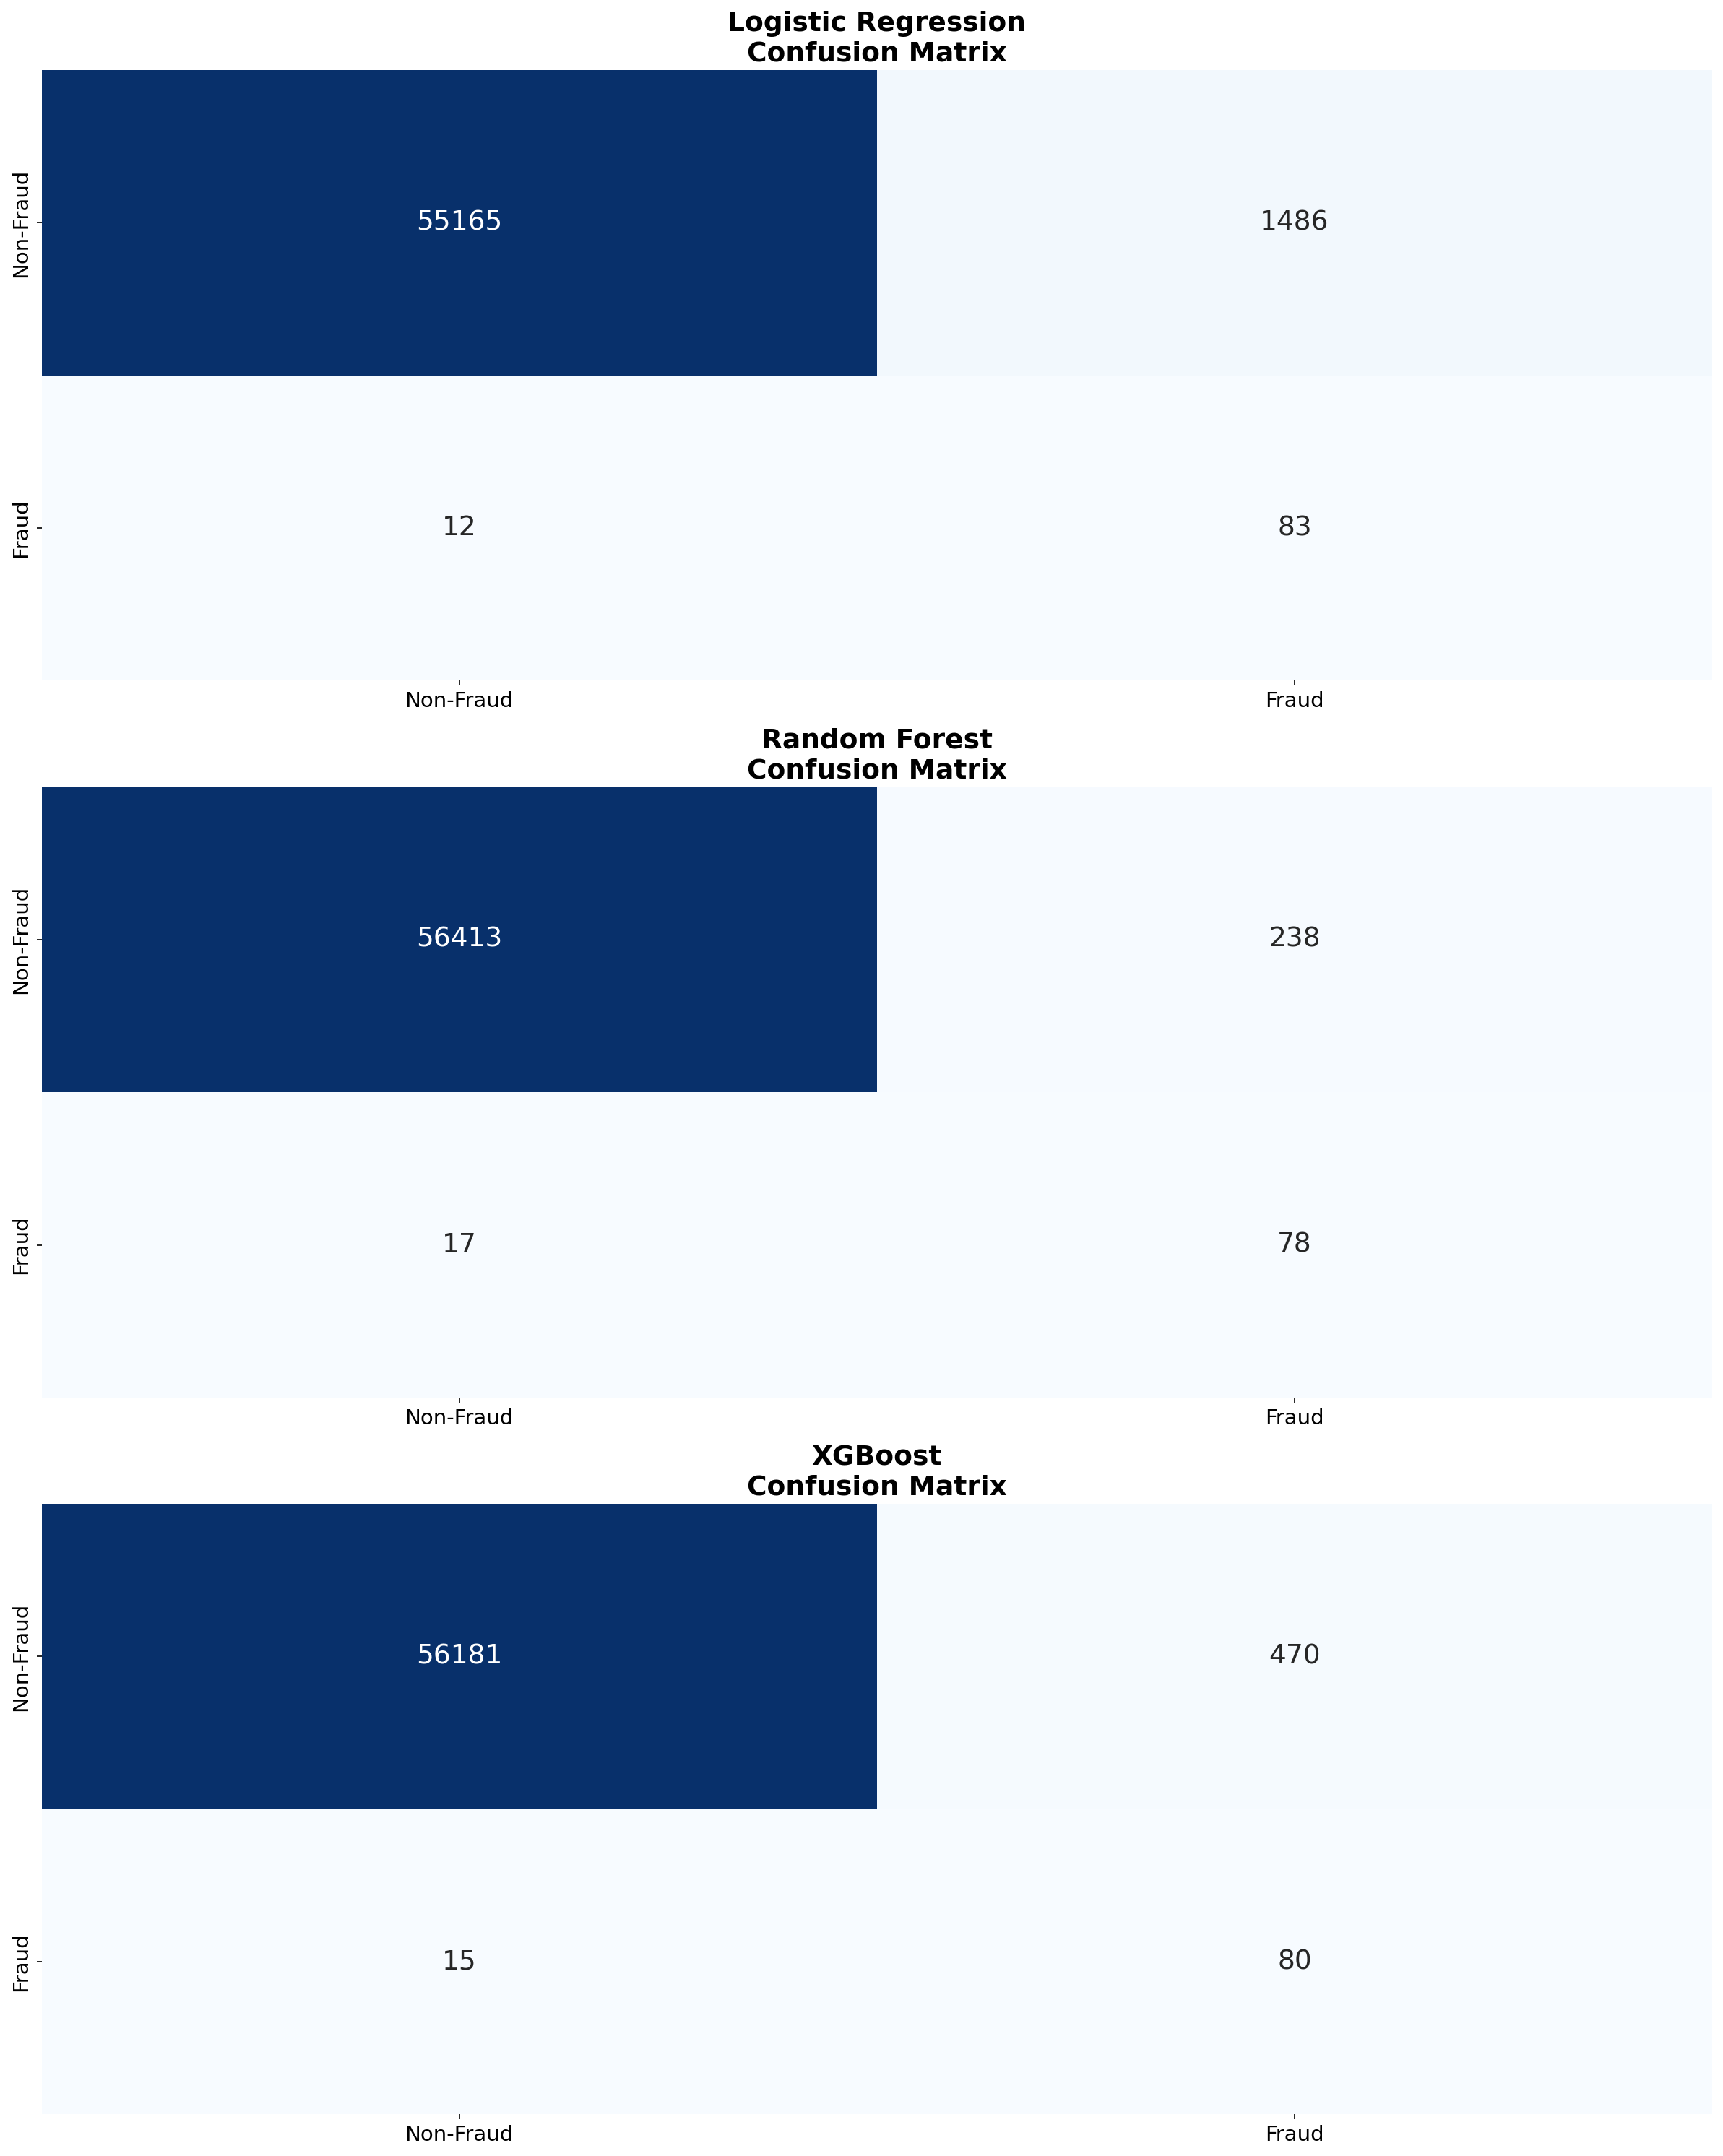

In [23]:
# Make predictions with models
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Generate confusion matrices
lr_cf = confusion_matrix(y_test, y_pred_lr)
rf_cf = confusion_matrix(y_test, y_pred_rf)
xgb_cf = confusion_matrix(y_test, y_pred_xgb)

# Set up vertical plot layout
fig, ax = plt.subplots(3, 1, figsize=(16, 20), dpi=150)

# Logistic Regression
sns.heatmap(lr_cf, ax=ax[0], annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 18})
ax[0].set_title("Logistic Regression\nConfusion Matrix", fontsize=18, fontweight='bold')
ax[0].set_xticklabels(['Non-Fraud', 'Fraud'], fontsize=14)
ax[0].set_yticklabels(['Non-Fraud', 'Fraud'], fontsize=14)

# Random Forest
sns.heatmap(rf_cf, ax=ax[1], annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 18})
ax[1].set_title("Random Forest\nConfusion Matrix", fontsize=18, fontweight='bold')
ax[1].set_xticklabels(['Non-Fraud', 'Fraud'], fontsize=14)
ax[1].set_yticklabels(['Non-Fraud', 'Fraud'], fontsize=14)

# XGBoost
sns.heatmap(xgb_cf, ax=ax[2], annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 18})
ax[2].set_title("XGBoost\nConfusion Matrix", fontsize=18, fontweight='bold')
ax[2].set_xticklabels(['Non-Fraud', 'Fraud'], fontsize=14)
ax[2].set_yticklabels(['Non-Fraud', 'Fraud'], fontsize=14)

plt.tight_layout()
plt.show()

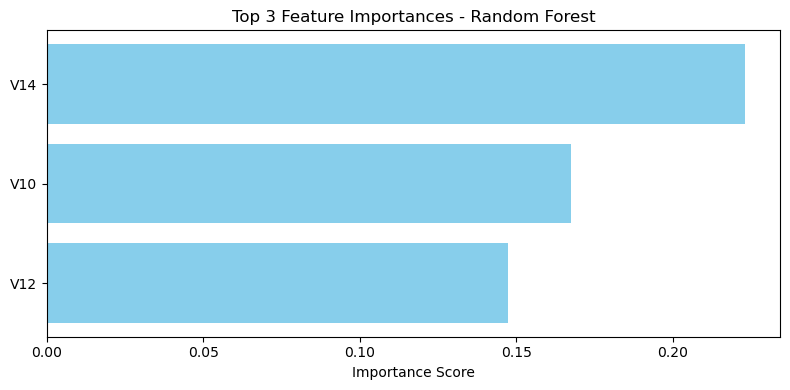

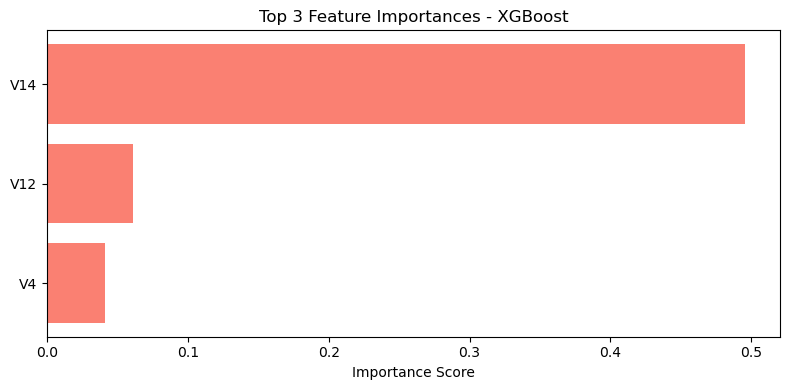

In [24]:
# --- Random Forest Top 3 ---
rf_importances = rf.feature_importances_
rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False).head(3)

# Plot Random Forest
plt.figure(figsize=(8, 4))
plt.barh(rf_df['Feature'], rf_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 3 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# --- XGBoost Top 3 ---
xgb_importances = xgb.feature_importances_
xgb_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False).head(3)

# Plot XGBoost
plt.figure(figsize=(8, 4))
plt.barh(xgb_df['Feature'], xgb_df['Importance'], color='salmon')
plt.gca().invert_yaxis()
plt.title('Top 3 Feature Importances - XGBoost')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()